In [1]:
from itertools import chain

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy


from scipy.sparse.csgraph import laplacian

from sklearn.cluster import SpectralClustering
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import rbf_kernel, cosine_similarity
from sklearn.cluster import SpectralClustering
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, make_scorer, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold


from sklearn.model_selection import train_test_split

import feature, utils

In [2]:
# Load data
df_data = pd.read_csv('../data/ice-cat-office-products.csv.gz', dtype=str, index_col=0)

category_counts = df_data["category_name"].value_counts()
large_enough_categories = category_counts[category_counts > 20].index.tolist()

df_data = df_data[df_data.category_name.isin(large_enough_categories)]

print(f"Number of categories: {len(df_data.category_name.unique())}")

Number of categories: 69


In [3]:
selected_category = 'Ballpoint Pens'

In [4]:
df = df_data.copy()
df.loc[df.category_name != selected_category, "category_name"] = "Other"
df.loc[df.category_name == selected_category, "category_id"] = 0
df.loc[df.category_name != selected_category, "category_id"] = 1

In [5]:
df.category_id.value_counts() / df.shape[0]

1    0.997111
0    0.002889
Name: category_id, dtype: float64

In [6]:
df.category_name.value_counts()

Other             7248
Ballpoint Pens      21
Name: category_name, dtype: int64

In [7]:
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [8]:
X = list(df.index)
y = list(df.category_id)
fold_no = 0
predicted_proba = []
predicted_label = []
for train_index, test_index in sss.split(X, y):
    fold_no += 1
    print(f"------------------\nProcessing fold {fold_no}")
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_index]
    
    feateure_transformer = feature.BasicIceCatFeatureTransformer(output_size=0.99)
    label_encoder = LabelEncoder()
    
    print("Generating features")
    feateure_transformer.fit(df_train)
    label_encoder.fit(df_train.category_name)
    
    X_train = feateure_transformer.transform(df_train)
    X_test = feateure_transformer.transform(df_test)
    y_train = label_encoder.transform(df_train.category_name)
    y_test = label_encoder.transform(df_test.category_name)
    
    print("Training model")
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    
    print("Generating predictions")
    y_pred_proba = lr.predict_proba(X_test)
    y_pred = lr.predict(X_test)
    
    print(classification_report(y_true=y_test, y_pred=y_pred, target_names=label_encoder.classes_))
    
    df_test.index, y_pred_proba[:,0]
    
    predicted_proba += list(zip(df_test.index, y_pred_proba[:,0]))
    predicted_label += list(zip(df_test.index, y_pred))

------------------
Processing fold 1
Generating features


/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['11', '14', '256'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['Acid'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['Carbon fibre'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['Alkaline', 'LR441', 'Solar with Battery back-up'] will be ignored
  warnings.warn('u

Training model
Generating predictions
                precision    recall  f1-score   support

Ballpoint Pens       0.00      0.00      0.00         4
         Other       1.00      1.00      1.00      1450

      accuracy                           1.00      1454
     macro avg       0.50      0.50      0.50      1454
  weighted avg       0.99      1.00      0.99      1454

------------------
Processing fold 2
Generating features


/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['200', '48'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['Vinyl'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['4 x AAA/1 x CR2032'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['IEEE 1284'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'

Training model
Generating predictions
                precision    recall  f1-score   support

Ballpoint Pens       1.00      0.75      0.86         4
         Other       1.00      1.00      1.00      1450

      accuracy                           1.00      1454
     macro avg       1.00      0.88      0.93      1454
  weighted avg       1.00      1.00      1.00      1454

------------------
Processing fold 3
Generating features


/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['150', '250', '288', '40', '60'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['Leather'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['AA (LR6)'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['300 x 200', '400 x 300', '400 x 700', '400 x 800'] will be ignored
  wa

Training model
Generating predictions
                precision    recall  f1-score   support

Ballpoint Pens       1.00      0.50      0.67         4
         Other       1.00      1.00      1.00      1450

      accuracy                           1.00      1454
     macro avg       1.00      0.75      0.83      1454
  weighted avg       1.00      1.00      1.00      1454

------------------
Processing fold 4
Generating features


/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['Wood'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['240', '462', '65'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['Plywood', 'Wood'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['NiMH AAA'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignore

Training model
Generating predictions
                precision    recall  f1-score   support

Ballpoint Pens       1.00      0.60      0.75         5
         Other       1.00      1.00      1.00      1449

      accuracy                           1.00      1454
     macro avg       1.00      0.80      0.87      1454
  weighted avg       1.00      1.00      1.00      1454

------------------
Processing fold 5
Generating features
Training model
Generating predictions
                precision    recall  f1-score   support

Ballpoint Pens       1.00      0.50      0.67         4
         Other       1.00      1.00      1.00      1449

      accuracy                           1.00      1453
     macro avg       1.00      0.75      0.83      1453
  weighted avg       1.00      1.00      1.00      1453



/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['Fabric'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['120', '152', '7', '84', '96'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['Plasteramic', 'Steel', 'Wax'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
/home/omar/.cache/pypoetry/virtualenvs/snow-leopard-O1gqMmLm-py3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:860: UserWarning: unknown class(es) ['4 x AAA + CR2032'] will be ignored
  warnings.warn('unk

In [9]:
indices, proba = zip(*predicted_proba)
df.loc[list(indices), f"PredProba_{selected_category}"] = list(proba)

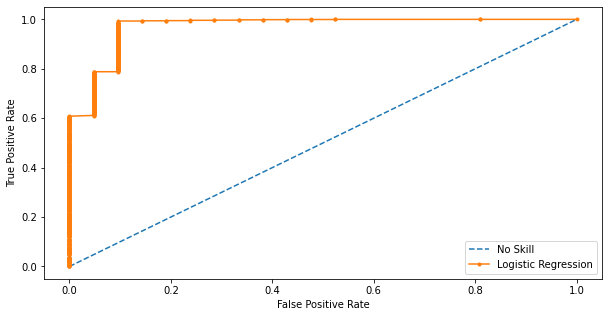

In [10]:
y_test_proba_lr = 1 - df[f"PredProba_{selected_category}"]
y_test = np.array(df["category_id"] == 1, dtype=int)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba_lr)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
ax.plot(fpr, tpr, marker='.', label='Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend()

In [11]:
indices, labels = zip(*predicted_label)
df.loc[list(indices), f"PredLabel_{selected_category}"] = list(labels)

In [12]:
y_pred = df[f"PredLabel_{selected_category}"] 
y_test = np.array(df["category_id"] == 1, dtype=int)

In [13]:
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=label_encoder.classes_))

                precision    recall  f1-score   support

Ballpoint Pens       0.77      0.48      0.59        21
         Other       1.00      1.00      1.00      7248

      accuracy                           1.00      7269
     macro avg       0.88      0.74      0.79      7269
  weighted avg       1.00      1.00      1.00      7269

